<a href="https://colab.research.google.com/github/biswajitpolai/credit_card_fraud/blob/main/credit_card_fraud_SMOTE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import self_utils as su
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
%matplotlib inline

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving self_utils.py to self_utils (1).py


## Importing the dataset

In [ ]:
df = pd.read_csv('/content/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


## Checking the discrepencies in the data and performing exploratory data analysis

In [ ]:
df.isna().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75357 entries, 0 to 75356
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    75357 non-null  int64  
 1   V1      75357 non-null  float64
 2   V2      75357 non-null  float64
 3   V3      75357 non-null  float64
 4   V4      75357 non-null  float64
 5   V5      75357 non-null  float64
 6   V6      75357 non-null  float64
 7   V7      75357 non-null  float64
 8   V8      75357 non-null  float64
 9   V9      75357 non-null  float64
 10  V10     75357 non-null  float64
 11  V11     75357 non-null  float64
 12  V12     75357 non-null  float64
 13  V13     75357 non-null  float64
 14  V14     75357 non-null  float64
 15  V15     75357 non-null  float64
 16  V16     75357 non-null  float64
 17  V17     75357 non-null  float64
 18  V18     75357 non-null  float64
 19  V19     75357 non-null  float64
 20  V20     75357 non-null  float64
 21  V21     75357 non-null  float64
 22

In [ ]:
len(df)

75357

In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,75357.000000,75357.000000,75357.000000,75357.000000,75357.000000,75357.000000,75357.000000,75357.000000,75357.000000,75357.000000,...,75357.000000,75357.000000,75357.000000,75357.000000,75357.000000,75357.000000,75356.000000,75356.000000,75356.000000,75356.000000
mean,36110.239845,-0.252779,-0.028574,0.678975,0.166227,-0.274493,0.097547,-0.114049,0.054618,0.003693,...,-0.029030,-0.105362,-0.038348,0.007033,0.135245,0.024984,0.002408,0.003170,97.386784,0.002428
std,14826.849221,1.877372,1.660941,1.402475,1.370891,1.387110,1.305219,1.253220,1.233482,1.151622,...,0.735801,0.636560,0.620647,0.596267,0.439933,0.498227,0.388885,0.325915,271.107132,0.049220
min,0.000000,-56.407510,-72.715728,-33.680984,-5.172595,-42.147898,-26.160506,-31.764946,-73.216718,-9.283925,...,-34.830382,-10.933144,-26.751119,-2.836627,-7.495741,-2.534330,-9.390980,-9.617915,0.000000,0.000000
25%,29808.000000,-1.014563,-0.595725,0.190522,-0.725740,-0.891744,-0.640664,-0.604835,-0.141745,-0.678360,...,-0.225114,-0.524347,-0.178518,-0.324097,-0.128460,-0.327494,-0.063013,-0.005684,7.680000,0.000000
50%,39061.000000,-0.246462,0.070645,0.766814,0.185626,-0.306681,-0.153060,-0.073692,0.067915,-0.080156,...,-0.059348,-0.079669,-0.050641,0.063602,0.173419,-0.073581,0.009421,0.022871,26.690000,0.000000
75%,47465.000000,1.153590,0.724071,1.398870,1.049550,0.263561,0.491405,0.418052,0.346752,0.644633,...,0.116887,0.309364,0.080096,0.404425,0.422121,0.305705,0.082473,0.075966,88.982500,0.000000
max,56021.000000,1.960497,18.902453,4.226108,16.715537,34.801666,22.529298,36.677268,20.007208,10.392889,...,22.614889,10.503090,17.297845,4.014444,5.525093,3.517346,12.152401,33.847808,19656.530000,1.000000


### Checking the distribution of data

<Axes: xlabel='Class', ylabel='count'>

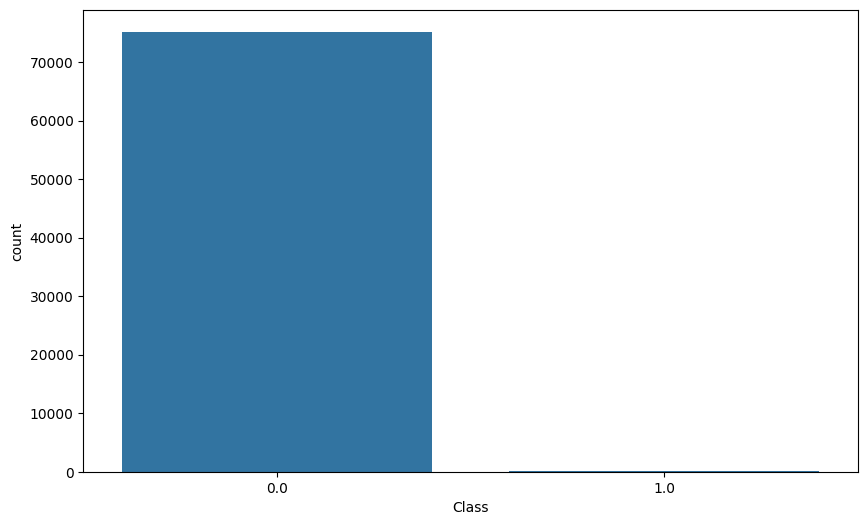

In [ ]:
plt.figure(dpi=100, figsize=(10,6))
sns.countplot(data=df, x='Class')

### Checking the effect of `Amount` and `Time` columns of the dataset on `Class`

<Axes: xlabel='Amount', ylabel='Class'>

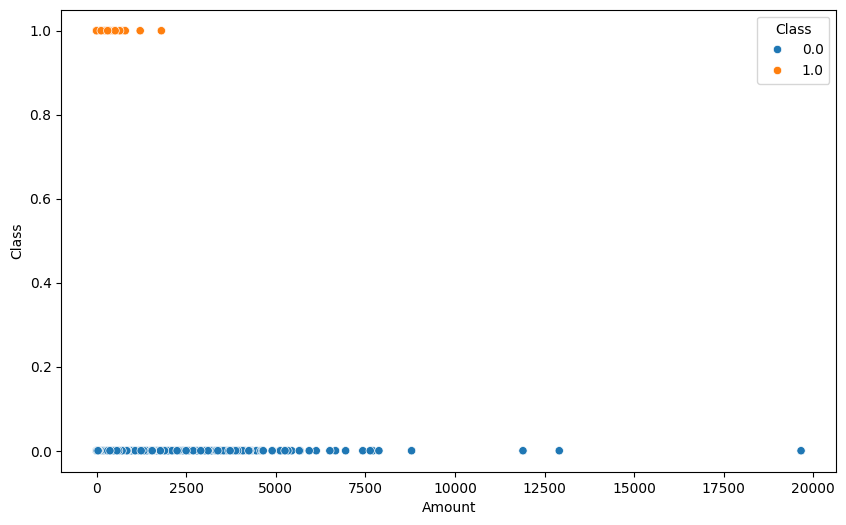

In [ ]:
plt.figure(dpi=100, figsize=(10,6))
sns.scatterplot(data=df, x='Amount', y='Class', hue='Class')

<Axes: xlabel='Time', ylabel='Class'>

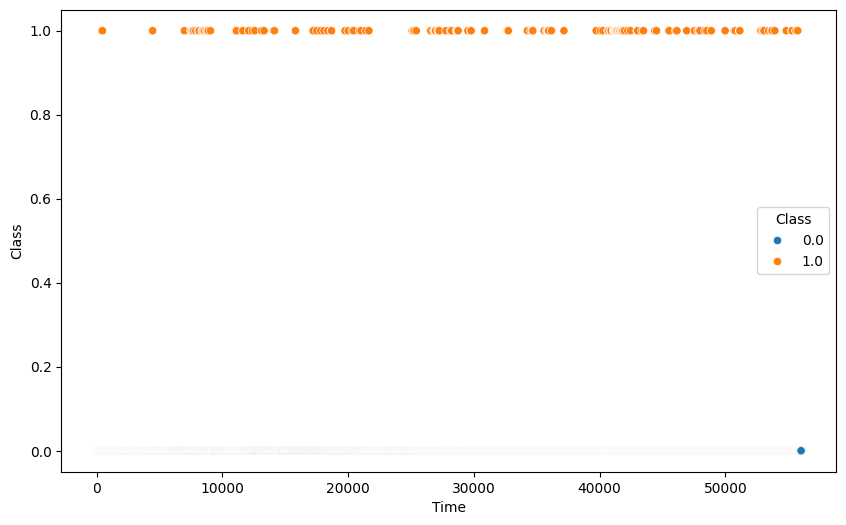

In [ ]:
plt.figure(dpi=100, figsize=(10,6))
sns.scatterplot(data=df, x='Time', y='Class', hue='Class', )

### Dropping the non impactful columns

In [ ]:
df = df.drop(['Time'], axis=1)
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


### Scaling `Amount` feature for better results

In [ ]:
sc = StandardScaler()
amount = df['Amount'].values

df['Amount'] = sc.fit_transform(amount.reshape(-1, 1))
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.192668,0.0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.349299,0.0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.037505,0.0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.096321,0.0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.101056,0.0


### Cleaning the dataset by removing any `NaN` or `infinite` values

In [ ]:
df = su.clean_dataset(df)

TypeError: DataFrame.any() takes 1 positional argument but 2 were given

### Checking the Distribution of various features of our dataset

<Figure size 640x480 with 0 Axes>

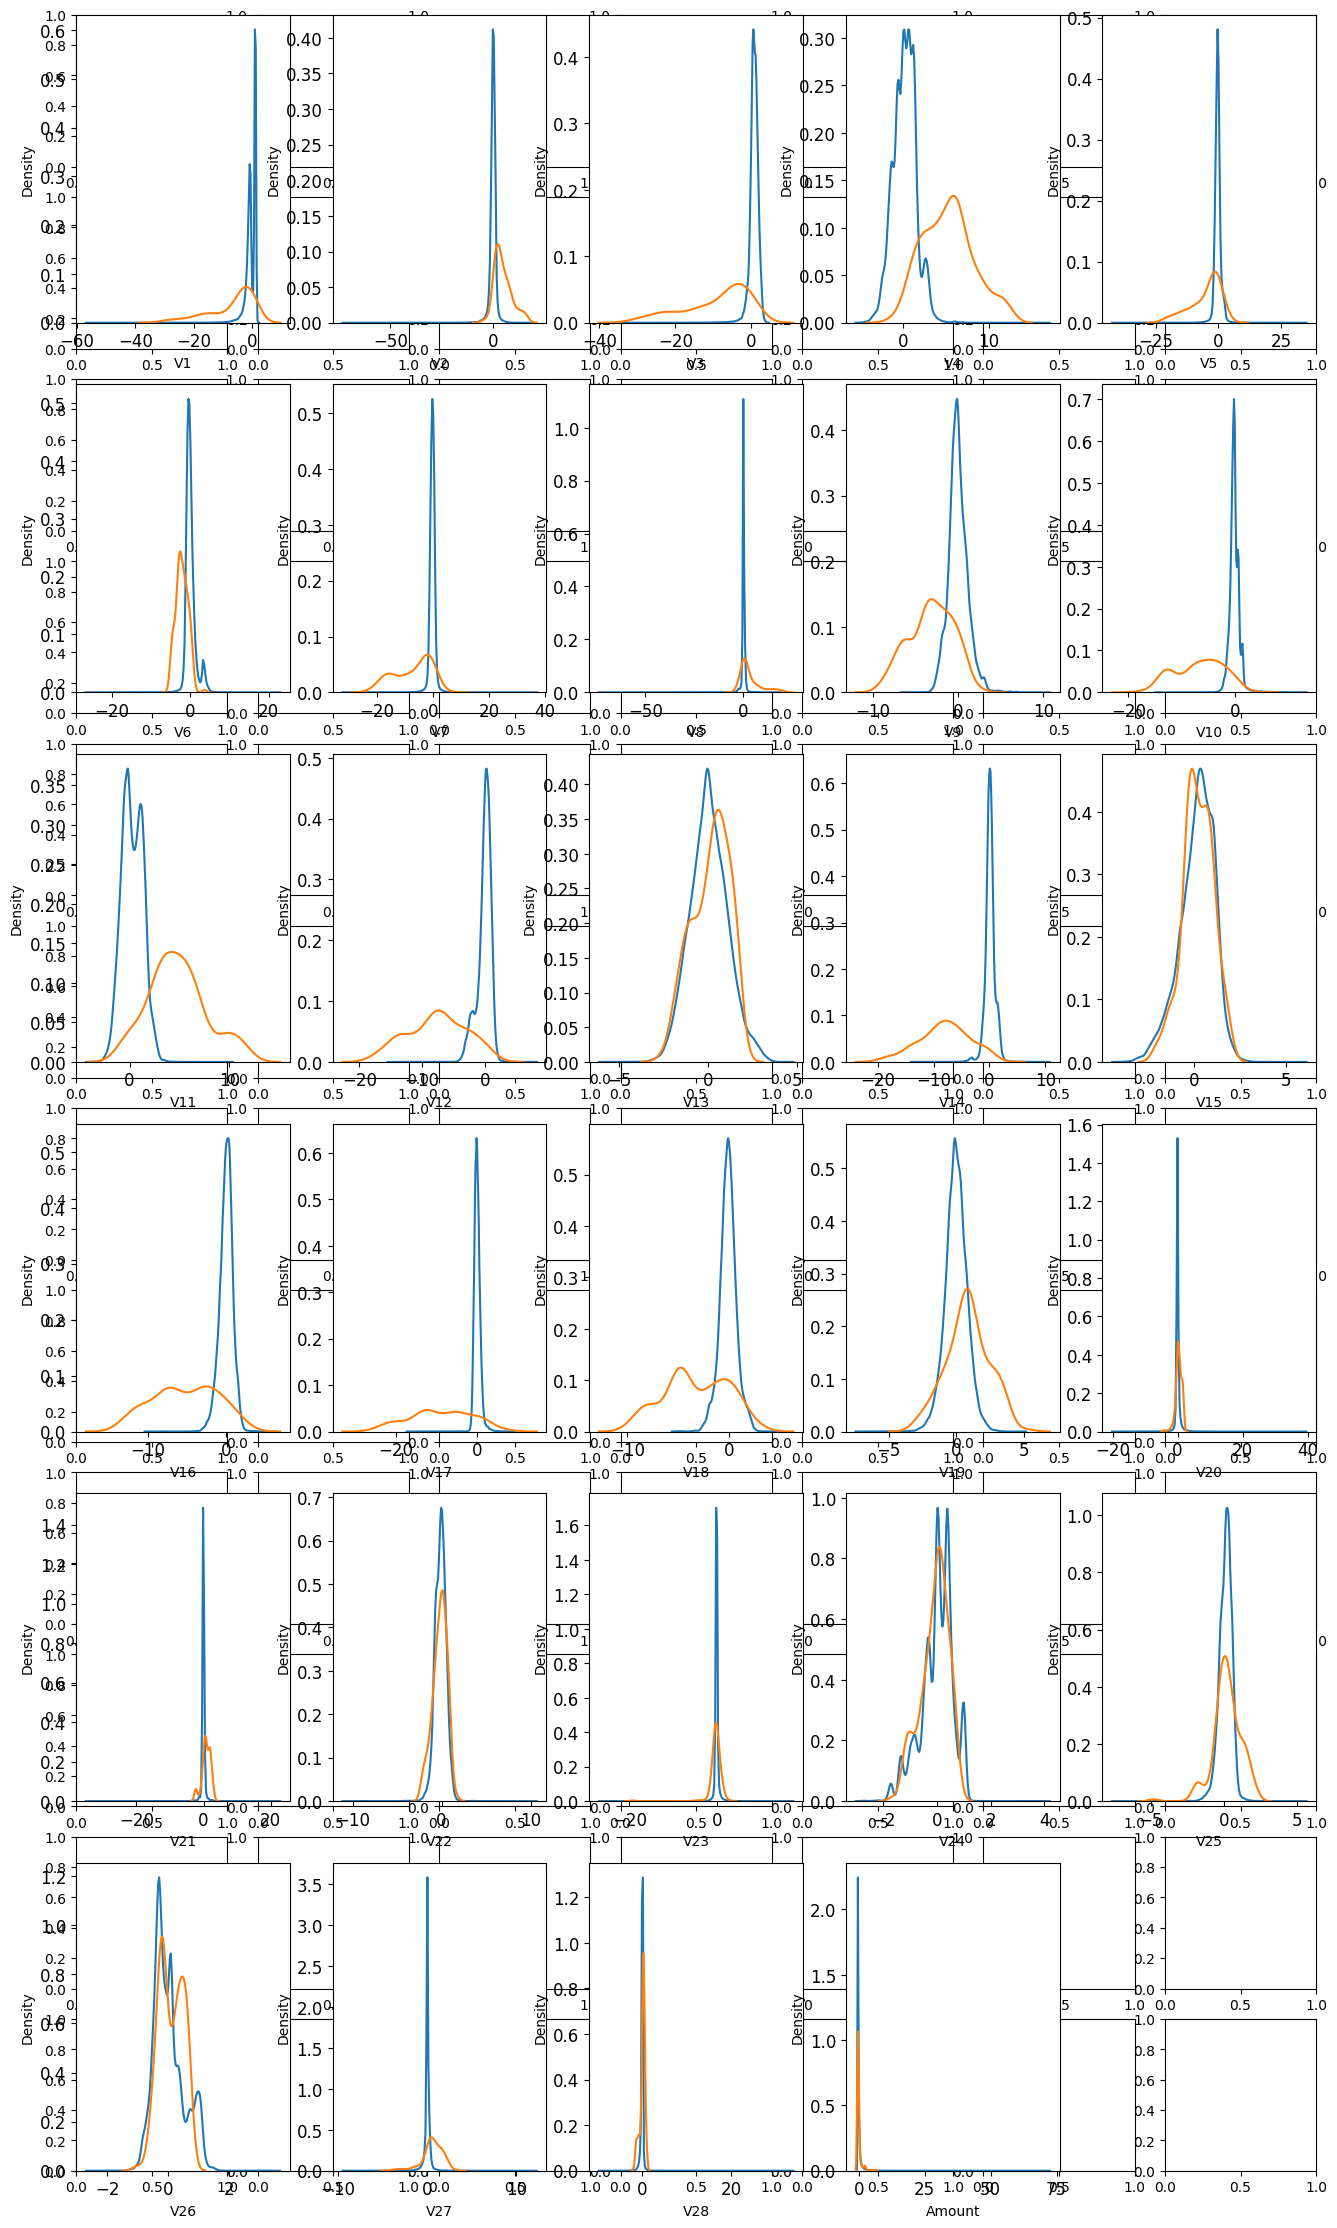

In [ ]:
columns = list(df.columns.values)
columns.remove("Class")
n = 1
t0 = df.loc[df['Class'] == 0]
t1 = df.loc[df['Class'] == 1]

plt.figure()
fig, ax = plt.subplots(12,7,figsize=(16,28))

for i in columns:
    plt.subplot(6,5,n)
    sns.kdeplot(t0[i],label="0")
    sns.kdeplot(t1[i],label="1")
    plt.xlabel(i, fontsize=10)
    locs, labels = plt.xticks()
    plt.tick_params(axis='both', which='major', labelsize=12)
    n =n + 1
plt.show();

## Preparing the dataset for training

In [ ]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

### Splitting the dataset into training and validation sets

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=7, test_size=0.4)
len(X_train)

45213

### Checking skewness and using a transformer to mitigate it

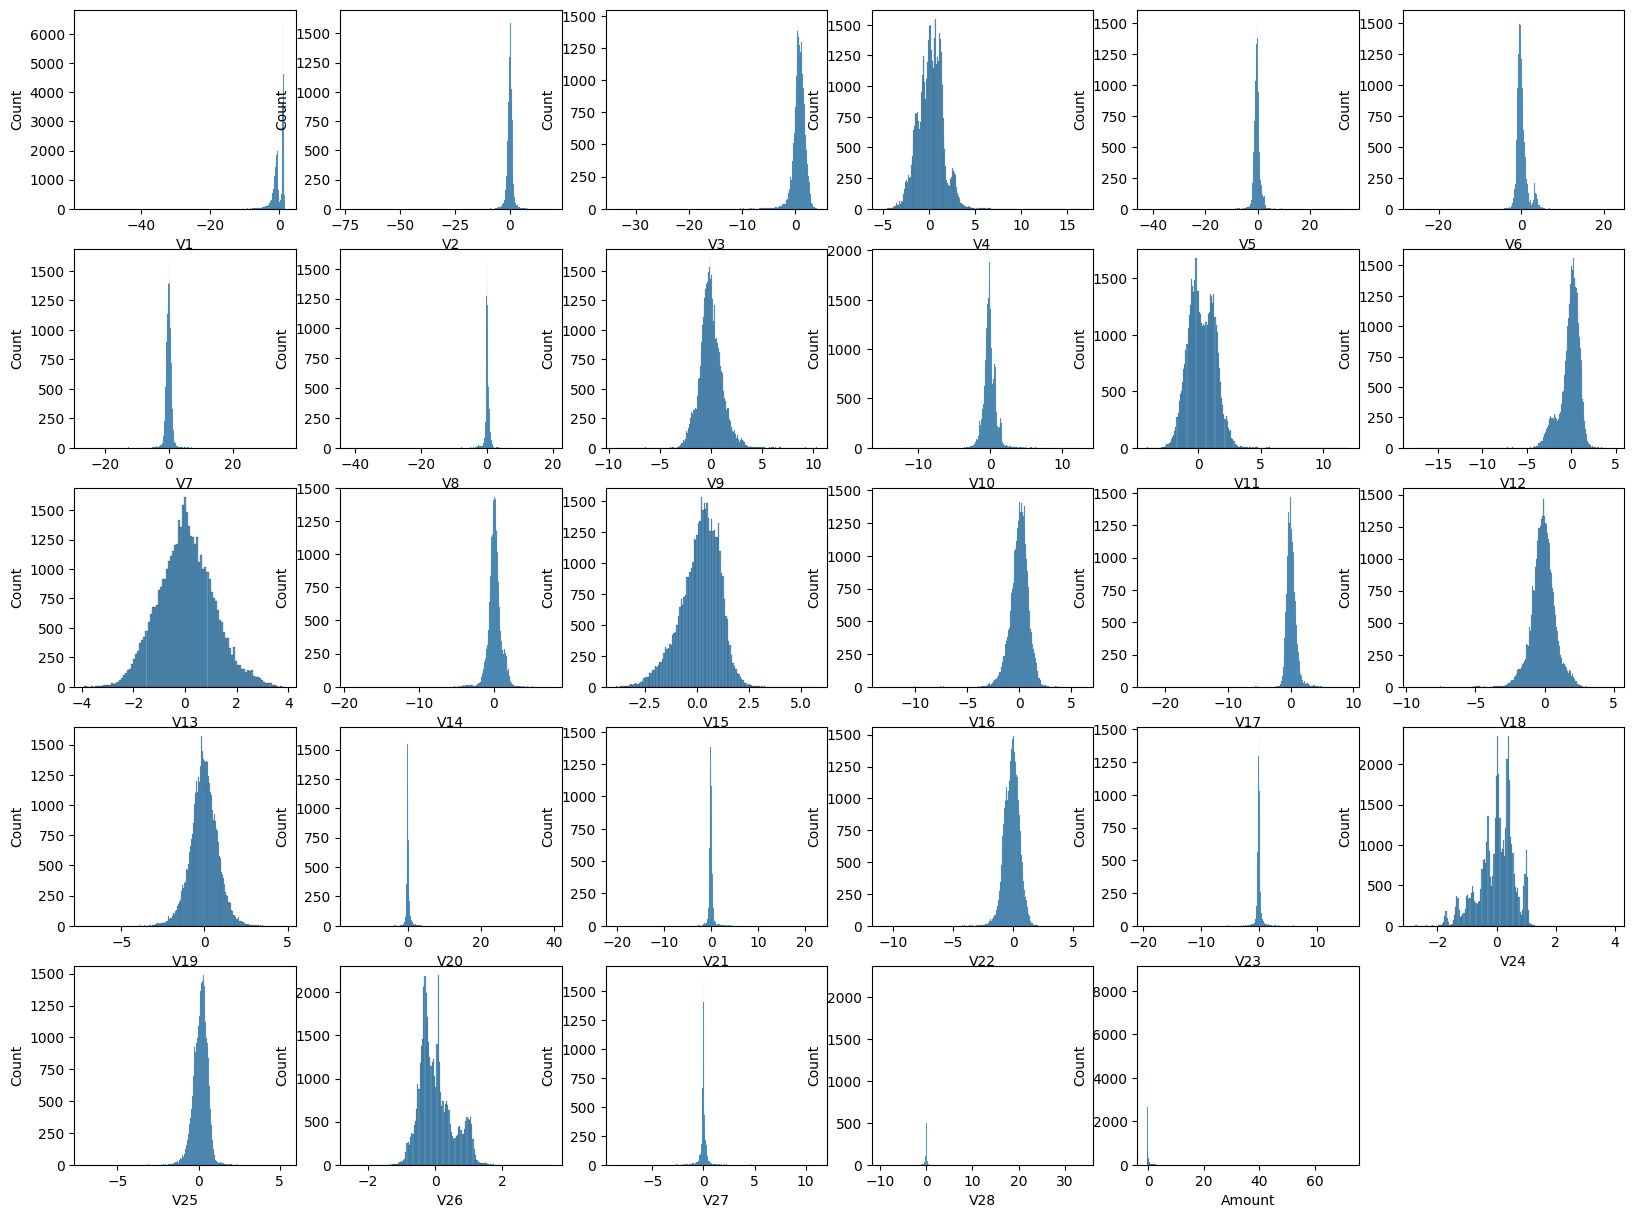

In [ ]:
col = X_train.columns
plt.figure(figsize=(20,15))
n=1
for i in col:
    plt.subplot(5,6, n)
    sns.histplot(data = X_train[i])
    n += 1
plt.show()
plt.rcParams.update({'figure.max_open_warning': 0})

In [ ]:
pt = PowerTransformer(method='yeo-johnson', standardize=True, copy=False)
X_train[col] = pt.fit_transform(X_train)
X_test[col] = pt.transform(X_test)

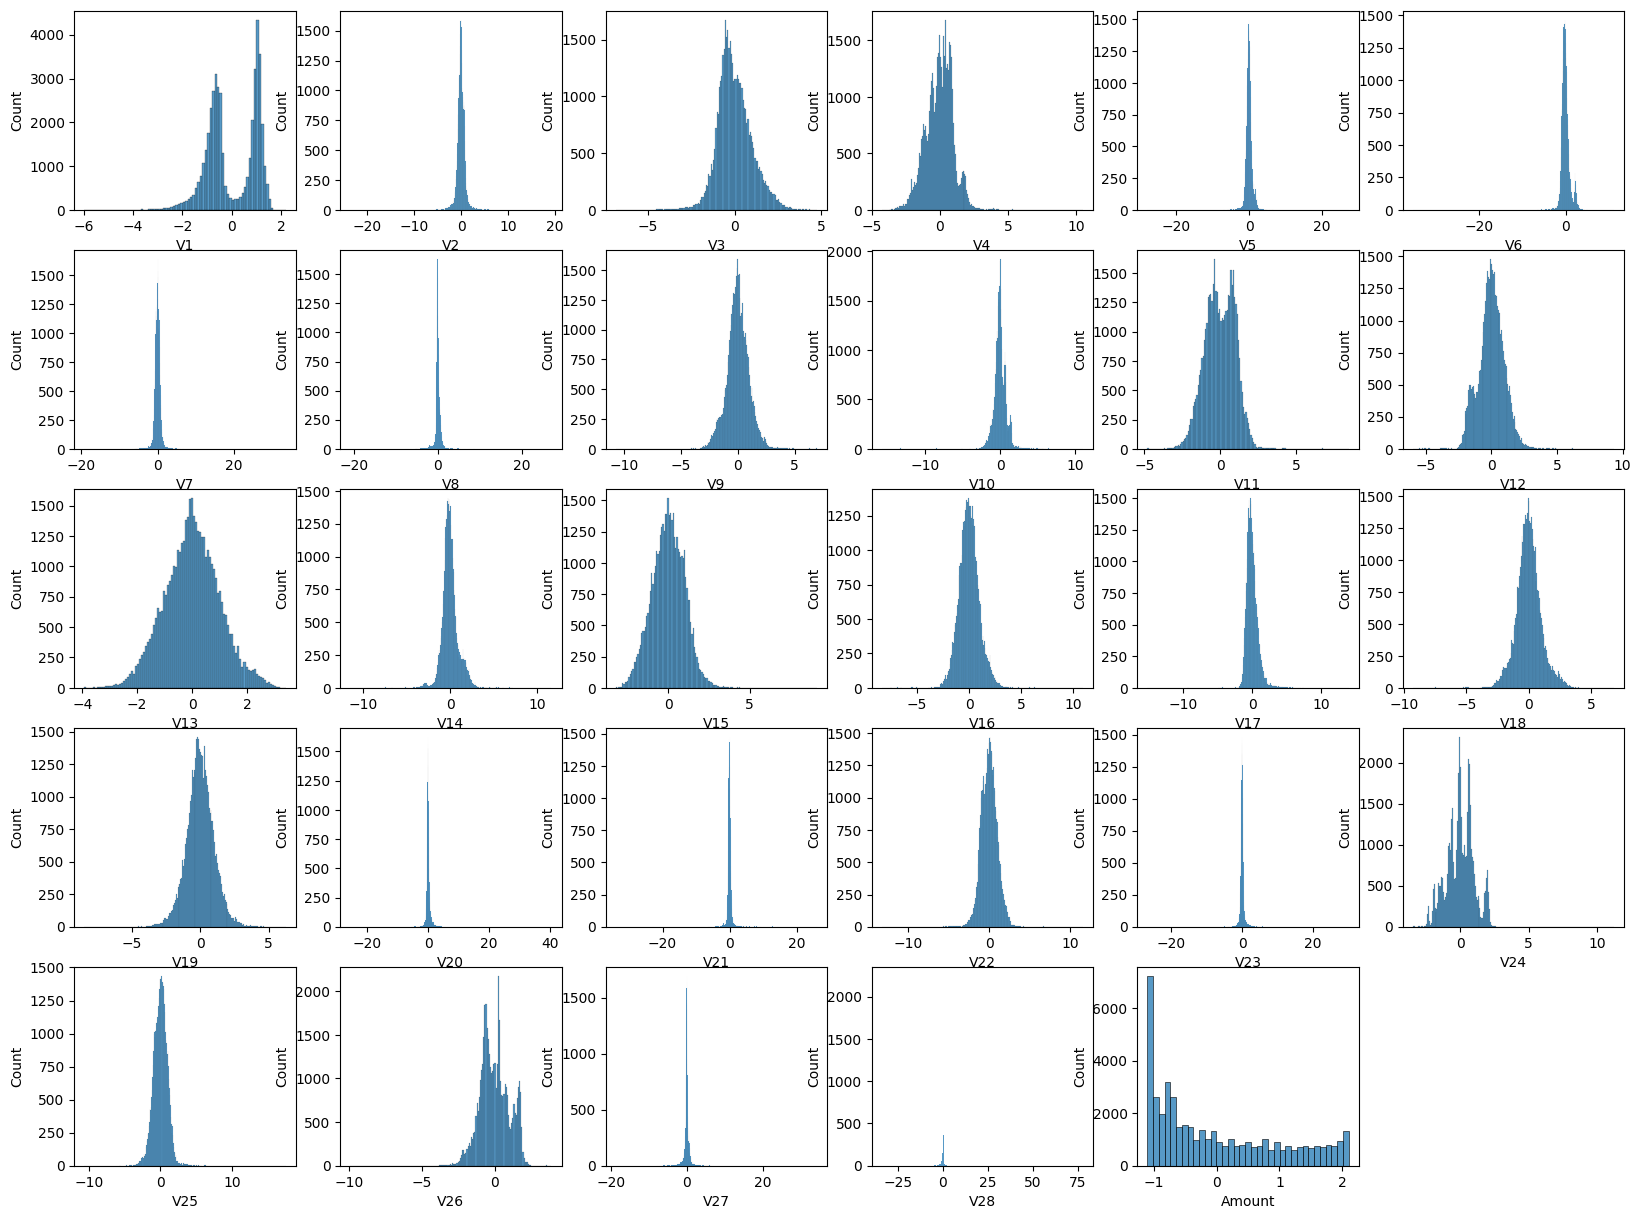

In [ ]:
col = X_train.columns
plt.figure(figsize=(20,15))
n=1
for i in col:
    plt.subplot(5,6, n)
    sns.histplot(data = X_train[i])
    n += 1
plt.show()
plt.rcParams.update({'figure.max_open_warning': 0})

### Creating synthetic data using `SMOTE` (Since the dataset is imbalanced)

In [ ]:
smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_resample(X_train.astype('float'), y_train)
print("Before performing smote : ", Counter(y_train))
print("After performing smote : ", Counter(y_train_smote))

Before performing smote :  Counter({0.0: 45106, 1.0: 107})
After performing smote :  Counter({0.0: 45106, 1.0: 45106})


## Testing various models on the dataset

### 1.1. Logistic Regression without synthetic data

In [ ]:
model_ws_1 = LogisticRegression(solver='lbfgs', max_iter=1000)
model_ws_1.fit(X_train, y_train)
y_pred_ws_1 = model_ws_1.predict(X_test)
acc_ws_1 = accuracy_score(y_test, y_pred_ws_1)
print("Accuracy: ", acc_ws_1)

Accuracy:  0.9988720432604585


#### Confusion Matrix

NameError: name 'clean_df' is not defined

#### `Accuracy`, `f1Score`, `precision` and `recall` of the model

In [ ]:
res11 = su.calculate_results(y_test, y_pred_ws_1)
res11

{'accuracy': 99.92363262905647,
 'f1': 0.9991764928671306,
 'precision': 0.9991777796981207,
 'recall': 0.9992363262905647}

### 1.2 Logistic Regression with synthetic data

In [ ]:
model_s_1 = LogisticRegression(solver='lbfgs', max_iter=1000)
model_s_1.fit(X_train_smote, y_train_smote)
y_pred_s_1 = model_s_1.predict(X_test)
acc_s_1 = accuracy_score(y_test, y_pred_s_1)
acc_s_1

0.9682680406941531

#### Confusion Matrix

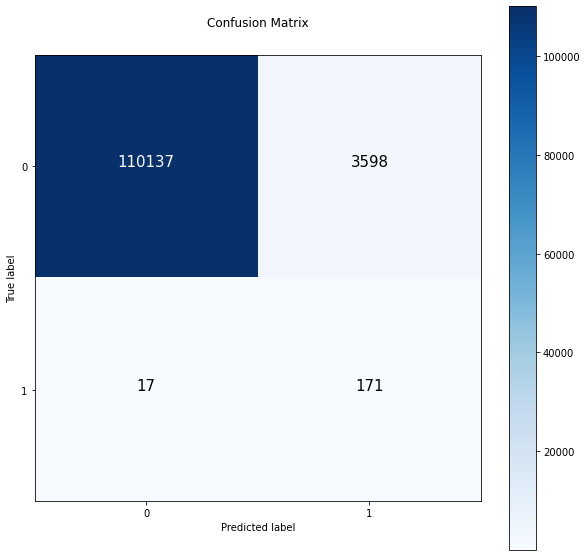

In [ ]:
su.make_confusion_matrix(y_test, y_pred_s_1)

#### `Accuracy`, `f1Score`, `precision` and `recall` of the model

In [ ]:
res12 = su.calculate_results(y_test, y_pred_s_1)
res12

{'accuracy': 96.8268040694153,
 'f1': 0.9823726425289926,
 'precision': 0.9982705593241589,
 'recall': 0.9682680406941531}

### 2.1. Decision Tree Classifier without synthetic data

In [ ]:
model_ws_2 = DecisionTreeClassifier(criterion='entropy', max_depth=5)
model_ws_2.fit(X_train, y_train)
y_pred_ws_2 = model_ws_2.predict(X_test)
acc_ws_2 = accuracy_score(y_test, y_pred_ws_2)
acc_ws_2

0.999469196828451

#### Confusion Matrix

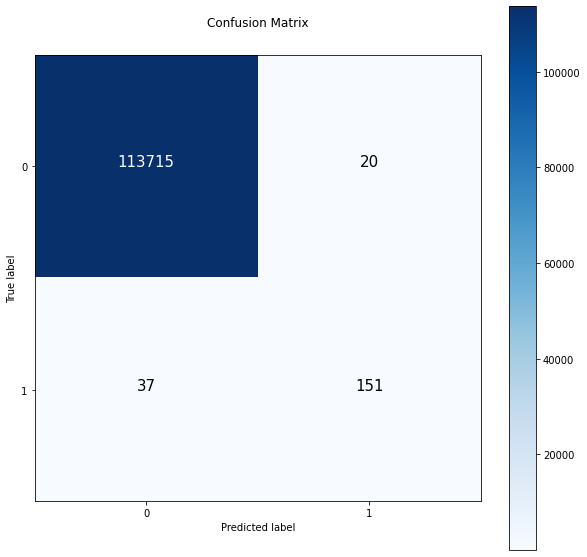

In [ ]:
su.make_confusion_matrix(y_test, y_pred_ws_2)

#### `Accuracy`, `f1Score`, `precision` and `recall` of the model

In [ ]:
res21 = su.calculate_results(y_test, y_pred_ws_2)
res21

{'accuracy': 99.9499662052439,
 'f1': 0.9994878343057972,
 'precision': 0.9994822575378066,
 'recall': 0.9994996620524389}

### 2.2. Decision Tree Classifier with synthetic data

In [ ]:
model_s_2 = DecisionTreeClassifier(criterion='entropy', max_depth=5)
model_s_2.fit(X_train_smote, y_train_smote)
y_pred_s_2 = model_s_2.predict(X_test)
acc_s_2 = accuracy_score(y_test, y_pred_s_2)
acc_s_2

0.9659622466244235

#### Confusion Matrix

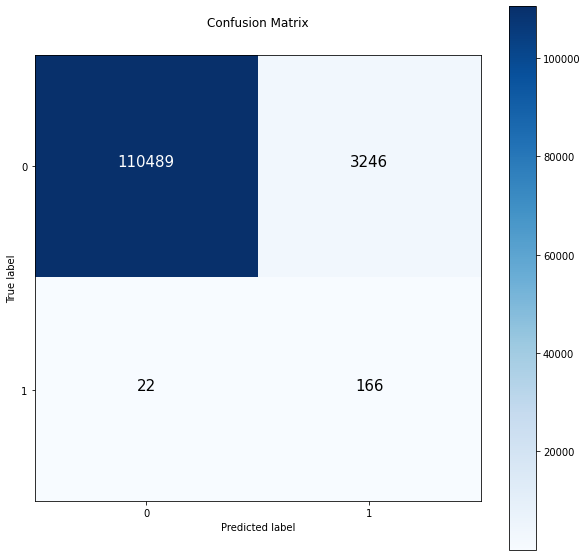

In [ ]:
su.make_confusion_matrix(y_test, y_pred_s_2)

#### `Accuracy`, `f1Score`, `precision` and `recall` of the model

In [ ]:
res22 = su.calculate_results(y_test, y_pred_s_2)
res22

{'accuracy': 97.13139576731652,
 'f1': 0.9839527193683296,
 'precision': 0.998231302925277,
 'recall': 0.9713139576731652}

### 3.1. Naive Bayes Classifier without synthetic data

In [ ]:
model_ws_3 = GaussianNB()
model_ws_3.fit(X_train, y_train)
y_pred_ws_3 = model_ws_3.predict(X_test)
acc_ws_3 = accuracy_score(y_test, y_pred_ws_3)
acc_ws_3

0.979630428291809

#### Confusion Matrix

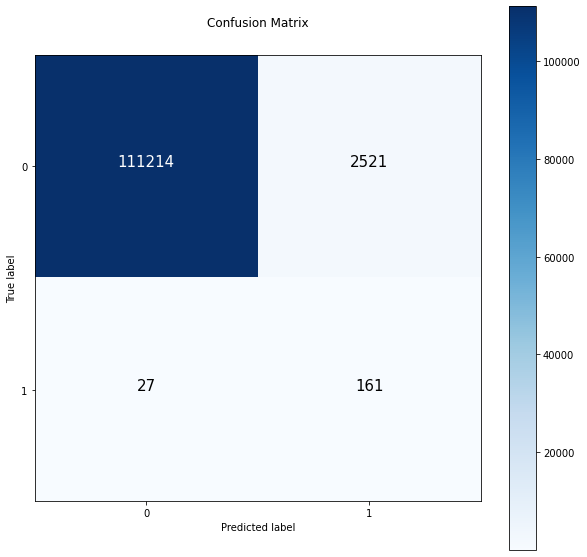

In [ ]:
su.make_confusion_matrix(y_test, y_pred_ws_3)

#### `Accuracy`, `f1Score`, `precision` and `recall` of the model

In [ ]:
res31 = su.calculate_results(y_test, y_pred_ws_3)
res31

{'accuracy': 97.76340159581471,
 'f1': 0.9872279486516491,
 'precision': 0.9982065103042518,
 'recall': 0.9776340159581471}

### 3.2. Naive Bayes Classifier with synthetic data

In [ ]:
model_s_3 = GaussianNB()
model_s_3.fit(X_train_smote, y_train_smote)
y_pred_s_3 = model_s_3.predict(X_test)
acc_s_3 = accuracy_score(y_test, y_pred_s_3)
acc_s_3

0.9768768868393989

#### Confusion Matrix

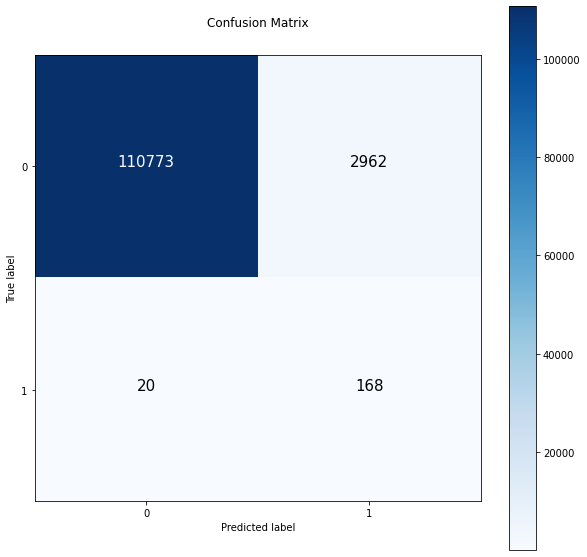

In [ ]:
su.make_confusion_matrix(y_test, y_pred_s_3)

#### `Accuracy`, `f1Score`, `precision` and `recall` of the model

In [ ]:
res32 = su.calculate_results(y_test, y_pred_s_3)
res32

{'accuracy': 97.38244252696997,
 'f1': 0.9852575980076678,
 'precision': 0.9982581186796419,
 'recall': 0.9738244252696997}

### 4.1. K Nearest Neighbors Classifier without synthetic data

In [ ]:
model_ws_4 = KNeighborsClassifier(n_neighbors=3)
model_ws_4.fit(X_train, y_train)
y_pred_ws_4 = model_ws_4.predict(X_test)
acc_ws_4 = accuracy_score(y_test, y_pred_ws_4)
acc_ws_4

0.9994360216302293

#### Confusion Matrix

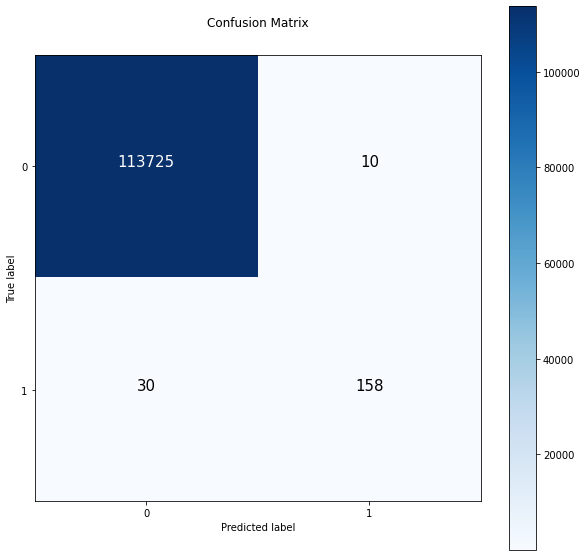

In [ ]:
su.make_confusion_matrix(y_test, y_pred_ws_4)

#### `Accuracy`, `f1Score`, `precision` and `recall` of the model

In [ ]:
res41 = su.calculate_results(y_test, y_pred_ws_4)
res41

{'accuracy': 99.96488856508343,
 'f1': 0.9996390383224936,
 'precision': 0.9996384821177722,
 'recall': 0.9996488856508343}

### 4.2. K Nearest Neighbors Classifier with synthetic data

In [ ]:
model_s_4 = KNeighborsClassifier(n_neighbors=3)
model_s_4.fit(X_train_smote, y_train_smote)
y_pred_s_4 = model_s_4.predict(X_test)
acc_s_4 = accuracy_score(y_test, y_pred_s_4)
acc_s_4

0.9983744152871313

#### Confusion Matrix

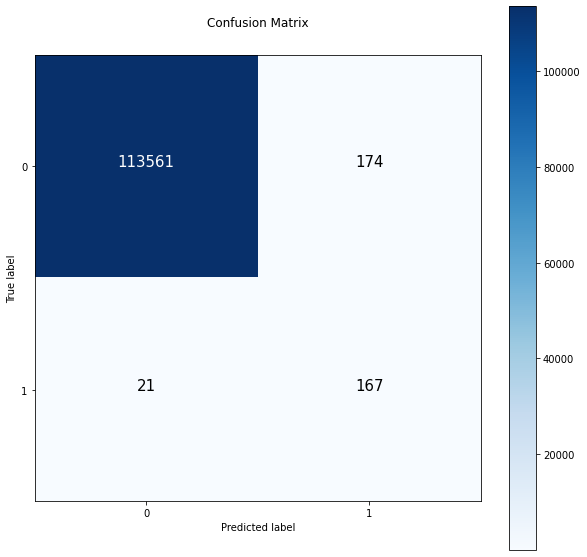

In [ ]:
su.make_confusion_matrix(y_test, y_pred_s_4)

#### `Accuracy`, `f1Score`, `precision` and `recall` of the model

In [ ]:
res42 = su.calculate_results(y_test, y_pred_s_4)
res42

{'accuracy': 99.82883175478175,
 'f1': 0.9985352721458867,
 'precision': 0.9989733600177202,
 'recall': 0.9982883175478174}

### 5.1. Random Forest Classifier without synthetic data

In [ ]:
model_ws_5 = RandomForestClassifier(max_depth=5, criterion='entropy')
model_ws_5.fit(X_train, y_train)
y_pred_ws_5 = model_ws_5.predict(X_test)
acc_ws_5 = accuracy_score(y_test, y_pred_ws_5)
acc_ws_5

0.9995355472248947

#### Confusion Matrix

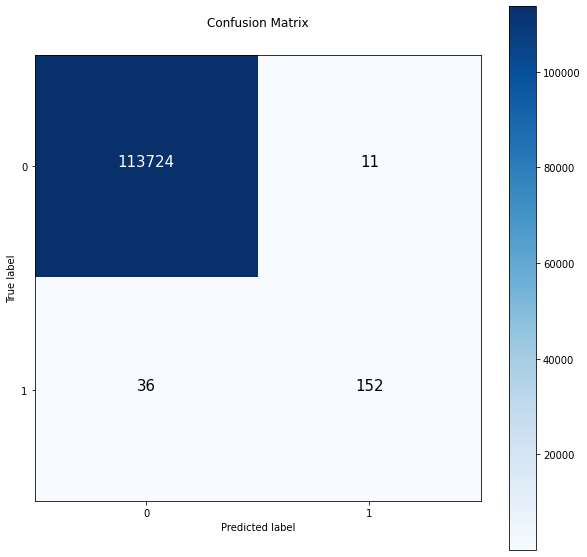

In [ ]:
su.make_confusion_matrix(y_test, y_pred_ws_5)

#### `Accuracy`, `f1Score`, `precision` and `recall` of the model

In [ ]:
res51 = su.calculate_results(y_test, y_pred_ws_5)
res51

{'accuracy': 99.95874406397304,
 'f1': 0.9995727710234154,
 'precision': 0.9995727008139532,
 'recall': 0.9995874406397304}

### 5.2. Random Forest Classifier with synthetic data

In [ ]:
model_s_5 = RandomForestClassifier(max_depth=5, criterion='entropy')
model_s_5.fit(X_train_smote, y_train_smote)
y_pred_s_5 = model_s_5.predict(X_test)
acc_s_5 = accuracy_score(y_test, y_pred_s_5)
acc_s_5

0.9978436121155824

#### Confusion Matrix

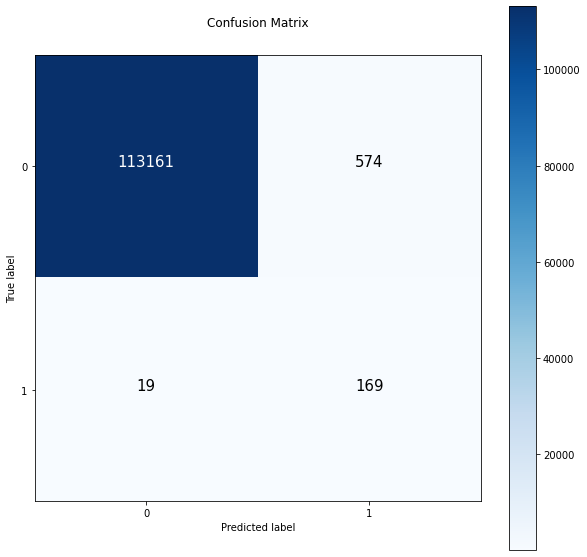

In [ ]:
su.make_confusion_matrix(y_test, y_pred_s_5)

#### `Accuracy`, `f1Score`, `precision` and `recall` of the model

In [ ]:
res52 = su.calculate_results(y_test, y_pred_s_5)
res52

{'accuracy': 99.47947297736191,
 'f1': 0.9963398812918721,
 'precision': 0.9985575222423041,
 'recall': 0.994794729773619}

### 6.1. Support Vector Classifier without synthetic data

In [ ]:
model_ws_6 = SVC()
model_ws_6.fit(X_train, y_train)
y_pred_ws_6 = model_ws_6.predict(X_test)
acc_ws_6 = accuracy_score(y_test, y_pred_ws_6)
acc_ws_6

0.9991374448462329

#### Confusion Matrix


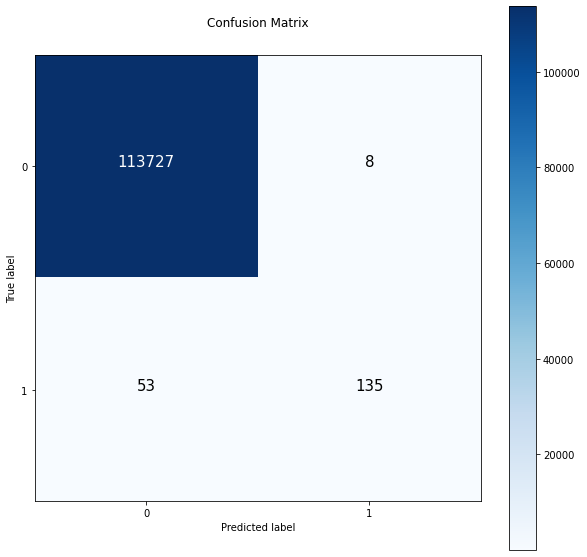

In [ ]:
su.make_confusion_matrix(y_test, y_pred_ws_6)

#### `Accuracy`, `f1Score`, `precision` and `recall` of the model

In [ ]:
res61 = su.calculate_results(y_test, y_pred_ws_6)
res61

{'accuracy': 99.94645506175223,
 'f1': 0.9994282059539296,
 'precision': 0.9994426365087574,
 'recall': 0.9994645506175224}

### 6.2. Support Vector Classifier with synthetic data

In [ ]:
model_s_6 = SVC()
model_s_6.fit(X_train_smote, y_train_smote)
y_pred_s_6 = model_s_6.predict(X_test)
acc_s_6 = accuracy_score(y_test, y_pred_s_6)
acc_s_6

0.9960521514116046

#### Confusion Matrix

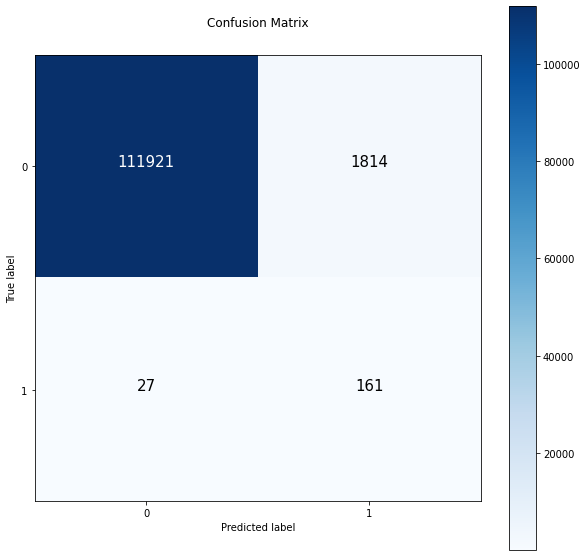

In [ ]:
su.make_confusion_matrix(y_test, y_pred_s_6)

#### `Accuracy`, `f1Score`, `precision` and `recall` of the model

In [ ]:
res62 = su.calculate_results(y_test, y_pred_s_6)
res62

{'accuracy': 98.38399620796503,
 'f1': 0.9904514309198762,
 'precision': 0.9982435028472977,
 'recall': 0.9838399620796503}

### 7.1. XGBoost Classifier without synthetic data

In [ ]:
model_ws_7 = XGBClassifier()
model_ws_7.fit(X_train, y_train)
y_pred_ws_7 = model_ws_7.predict(X_test)
acc_ws_7 = accuracy_score(y_test, y_pred_ws_7)
acc_ws_7

0.9996018976213383

#### Confusion Matrix

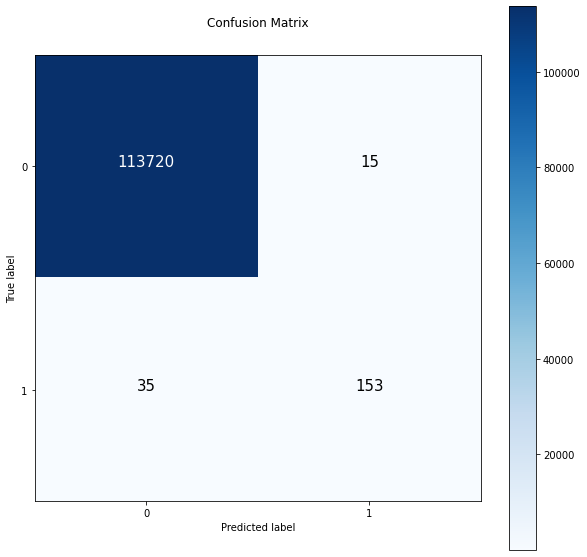

In [ ]:
su.make_confusion_matrix(y_test, y_pred_ws_7)

#### `Accuracy`, `f1Score`, `precision` and `recall` of the model

In [ ]:
res71 = su.calculate_results(y_test, y_pred_ws_7)
res71

{'accuracy': 99.9561107063543,
 'f1': 0.9995487979031169,
 'precision': 0.9995454863310302,
 'recall': 0.999561107063543}

### 7.2. XGBoost Classifier with synthetic data

Accuracy: 0.9994028464320074


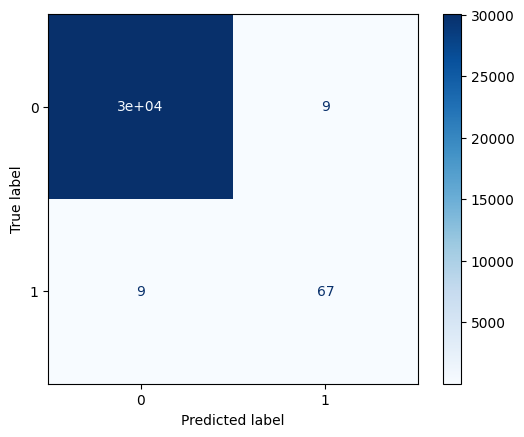

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Train the XGBClassifier model
model_s_7 = XGBClassifier()
model_s_7.fit(X_train_smote, y_train_smote)

# Make predictions
y_pred_s_7 = model_s_7.predict(X_test)

# Calculate accuracy
acc_s_7 = accuracy_score(y_test, y_pred_s_7)
print(f"Accuracy: {acc_s_7}")

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred_s_7)

# Create the confusion matrix display
cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_s_7.classes_)

# Plot the confusion matrix
cmd.plot(cmap=plt.cm.Blues)

# Show the plot
plt.show()


#### Confusion Matrix

In [ ]:
make_confusion_matrix(y_test, y_pred_s_7, classes=model_s_7.classes_, norm=True, savefig=True)

NameError: name 'make_confusion_matrix' is not defined

#### `Accuracy`, `f1Score`, `precision` and `recall` of the model

In [ ]:
res72 = su.calculate_results(y_test, y_pred_s_7)
res72

{'accuracy': 98.75529963220771,
 'f1': 0.9924102880560758,
 'precision': 0.9983879151042601,
 'recall': 0.9875529963220772}

# Comparing precision, accuracy f1 score and recall of all the models

In [ ]:
dp = pd.DataFrame([res11,res12,res21,res22,res31,res32,res41,res42,res51,res52,res61,res62,res71,res72],index=['1.1','1.2','2.1','2.2','3.1','3.2','4.1','4.2','5.1','5.2','6.1','6.2','7.1','7.2'])

NameError: name 'res11' is not defined

In [ ]:
dp

,accuracy,precision,recall,f1
1.1,99.923633,0.999178,0.999236,0.999176
1.2,96.826804,0.998271,0.968268,0.982373
2.1,99.949966,0.999482,0.999500,0.999488
2.2,97.131396,0.998231,0.971314,0.983953
3.1,97.763402,0.998207,0.977634,0.987228
3.2,97.382443,0.998258,0.973824,0.985258
4.1,99.964889,0.999638,0.999649,0.999639
4.2,99.828832,0.998973,0.998288,0.998535
5.1,99.958744,0.999573,0.999587,0.999573
5.2,99.479473,0.998558,0.994795,0.996340
